In [1]:
import os
import pandas as pd

/Users/suchitranayak/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
company_folders ={
   'lvmh': 'Company_Benefits/lvmh',
    'hugo_boss': 'Company_Benefits/hugo boss',
    'porsche': 'Company_Benefits/porsche',
    'ralph_lauren': 'Company_Benefits/ralph_lauren',
    'adidas' : 'Company_Benefits/adidas'
}

In [3]:
# Iterate through each company's folder
for company, folder_path in company_folders.items():
    
    # Check if the folder path exists to prevent errors
    if not os.path.exists(folder_path):
        print(f"Warning: The folder path '{folder_path}' for {company} does not exist.")
        continue  # Skip to the next company
    
    # List to hold all the DataFrames for the current company
    dataframes = []
    
    # Iterate over all the files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            # Read the CSV file and append the DataFrame to the list
            df = pd.read_csv(file_path)
            dataframes.append(df)
    
    # Check if any CSV files were read for the current company
    if len(dataframes) == 0:
        print(f"No CSV files were found for {company}.")
        continue  # Skip to the next company
    
    # Concatenate all DataFrames in the list into a single DataFrame
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    
    # Save the merged DataFrame to a new CSV file named after the company
    output_filename = f"Company_Benefits_Merged/{company}_merged_output.csv"
    merged_df.to_csv(output_filename, index=False)
    
    # Confirmation message
    print(f"Merged file for {company} saved as {output_filename}")

Merged file for lvmh saved as Company_Benefits_Merged/lvmh_merged_output.csv
Merged file for hugo_boss saved as Company_Benefits_Merged/hugo_boss_merged_output.csv
Merged file for porsche saved as Company_Benefits_Merged/porsche_merged_output.csv
Merged file for ralph_lauren saved as Company_Benefits_Merged/ralph_lauren_merged_output.csv
Merged file for adidas saved as Company_Benefits_Merged/adidas_merged_output.csv


Sample job descriptions from lvmh:
Benefit counts for lvmh:
Health and Insurance Benefits            1
Career Development Opportunities        28
Paid Time Off / Vacation                14
Company Culture and Work Environment    30
Employee Discounts and Perks            17
dtype: int64


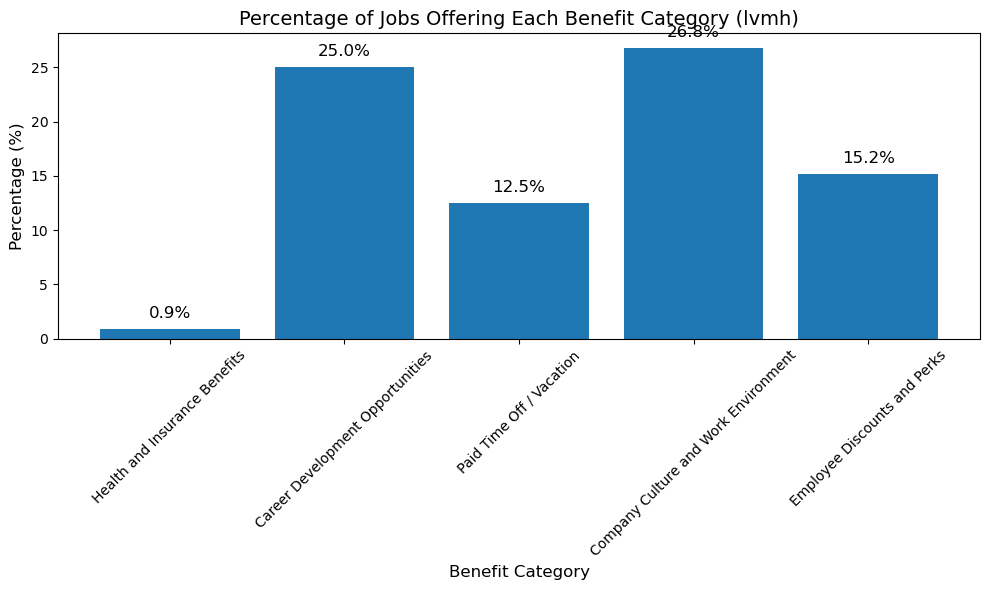

Classified benefits for lvmh saved to: Company_Benefits_classified/lvmh_job_benefits_classified.csv
Sample job descriptions from hugo_boss:
Benefit counts for hugo_boss:
Health and Insurance Benefits            45
Career Development Opportunities         92
Paid Time Off / Vacation                 32
Company Culture and Work Environment    119
Employee Discounts and Perks            102
dtype: int64


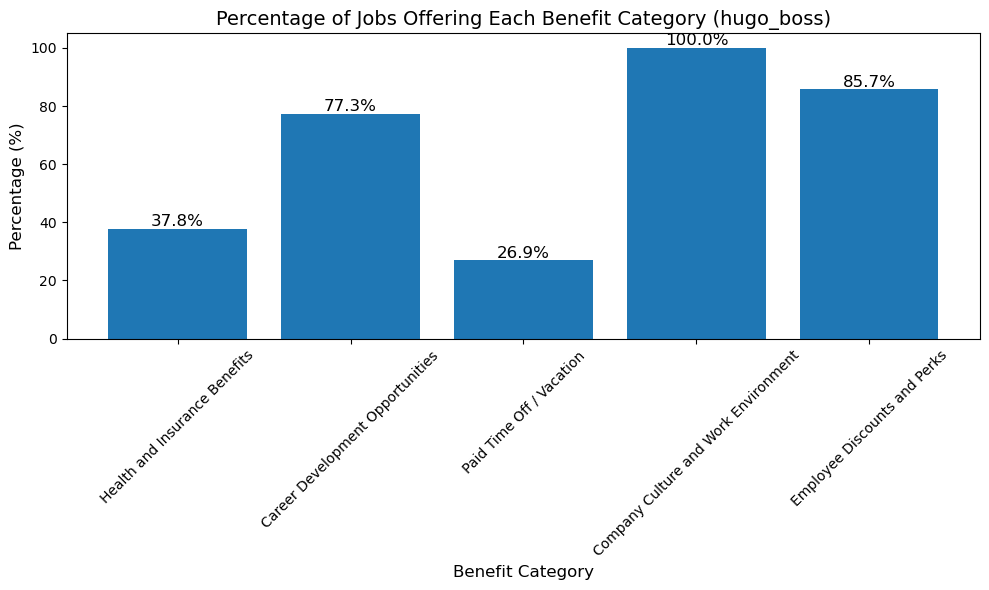

Classified benefits for hugo_boss saved to: Company_Benefits_classified/hugo_boss_job_benefits_classified.csv
Sample job descriptions from porsche:
Benefit counts for porsche:
Health and Insurance Benefits           0
Career Development Opportunities        7
Paid Time Off / Vacation                0
Company Culture and Work Environment    6
Employee Discounts and Perks            0
dtype: int64


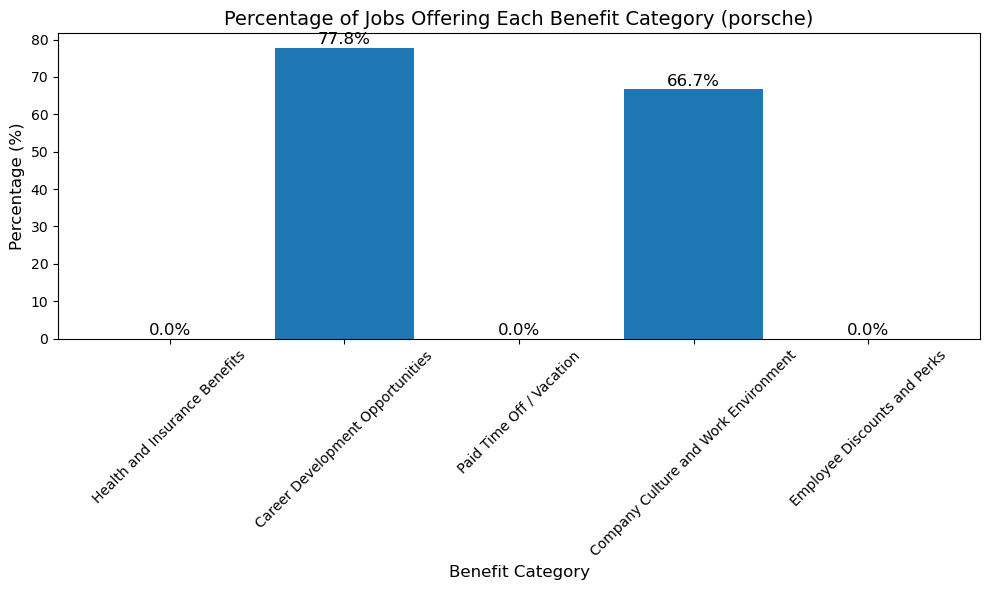

Classified benefits for porsche saved to: Company_Benefits_classified/porsche_job_benefits_classified.csv
Sample job descriptions from ralph_lauren:
Benefit counts for ralph_lauren:
Health and Insurance Benefits            7
Career Development Opportunities        17
Paid Time Off / Vacation                 7
Company Culture and Work Environment    17
Employee Discounts and Perks            12
dtype: int64


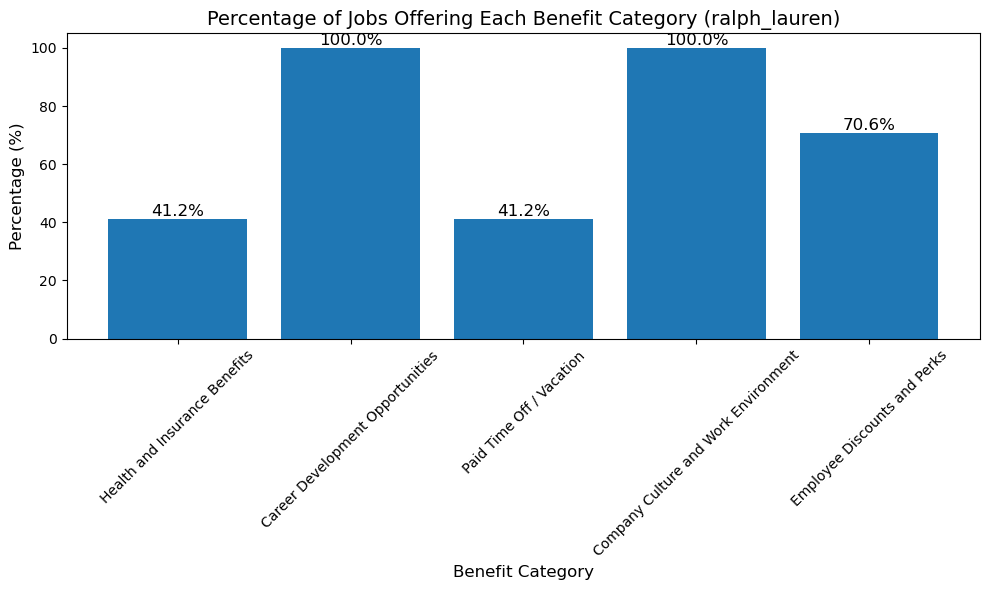

Classified benefits for ralph_lauren saved to: Company_Benefits_classified/ralph_lauren_job_benefits_classified.csv
Sample job descriptions from adidas:
Benefit counts for adidas:
Health and Insurance Benefits           15
Career Development Opportunities        19
Paid Time Off / Vacation                 0
Company Culture and Work Environment    15
Employee Discounts and Perks            15
dtype: int64


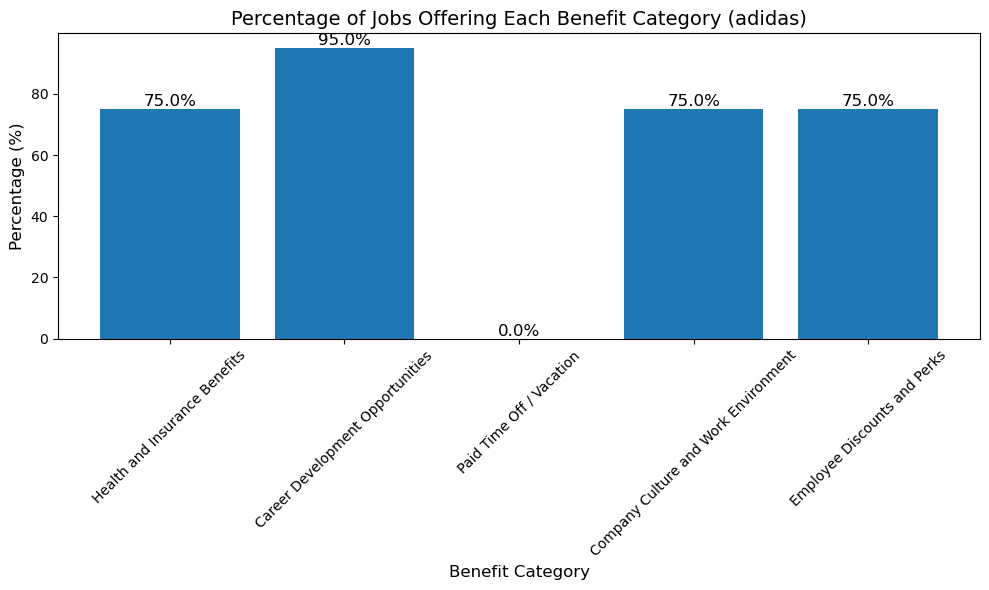

Classified benefits for adidas saved to: Company_Benefits_classified/adidas_job_benefits_classified.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Dictionary of merged company files
merged_files = {
    'lvmh': 'Company_Benefits_Merged/lvmh_merged_output.csv',
    'hugo_boss': 'Company_Benefits_Merged/hugo_boss_merged_output.csv',
    'porsche': 'Company_Benefits_Merged/porsche_merged_output.csv',
    'ralph_lauren': 'Company_Benefits_Merged/ralph_lauren_merged_output.csv',
    'adidas': 'Company_Benefits_Merged/adidas_merged_output.csv'
}

# Dictionary to map the correct job description column for each company
job_description_column_adjusted = {
    'hugo_boss': 'Job Details',
    'lvmh': 'Additional Information',
    'porsche': 'Detailed Job Description',
    'ralph_lauren': 'Job Description',
    'adidas': 'Job Description',
}

# Define English and German benefit keywords
english_benefit_keywords = {
    'Health and Insurance Benefits': ['health', 'insurance'],
    'Career Development Opportunities': ['career', 'development', 'training', 'growth', 'leadership'],
    'Paid Time Off / Vacation': ['vacation', 'paid time off'],
    'Company Culture and Work Environment': ['culture', 'work environment', 'flexible', 'work-life balance'],
    'Employee Discounts and Perks': ['discount', 'perks']
}

german_benefit_keywords = {
    'Health and Insurance Benefits': ['gesundheit', 'versicherung'],
    'Career Development Opportunities': ['karriere', 'entwicklung', 'training', 'wachstum', 'führung'],
    'Paid Time Off / Vacation': ['urlaub', 'freizeit'],
    'Company Culture and Work Environment': ['kultur', 'arbeitsumfeld', 'flexibel', 'work-life balance'],
    'Employee Discounts and Perks': ['rabatt', 'vorteil']
}

new_standard_categories = [
    'Health and Insurance Benefits', 
    'Career Development Opportunities', 
    'Paid Time Off / Vacation', 
    'Company Culture and Work Environment', 
    'Employee Discounts and Perks'
]

# Process each merged file
for company, file_path in merged_files.items():
    
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"Warning: File {file_path} not found for {company}.")
        continue
    
    # Step 1: Read the merged CSV file
    job_data_new = pd.read_csv(file_path)
    
    # Use the correct job description column for this company
    job_description_col = job_description_column_adjusted.get(company, None)
    
    # Debug: Check if the correct job description column exists and print a few descriptions
    if job_description_col not in job_data_new.columns:
        print(f"Error: '{job_description_col}' column not found in {company} data.")
        continue
    
    print(f"Sample job descriptions from {company}:")
    
    combined_benefit_classifications = []

    # Step 5: Analyze and classify benefits based on job descriptions
    for index, row in job_data_new.iterrows():
        job_description = row.get(job_description_col, '')
        job_title = row.get('Job Title', '')
        
        # Ensure job_description is a string
        if not isinstance(job_description, str):
            job_description = ''
        
        job_benefits = {'Job Title': job_title}
        
        # Check English keywords
        for category, keywords in english_benefit_keywords.items():
            job_benefits[category] = any(keyword in job_description.lower() for keyword in keywords)
        
        # Check German keywords
        for category, keywords in german_benefit_keywords.items():
            job_benefits[category] = job_benefits.get(category, False) or any(keyword in job_description.lower() for keyword in keywords)
        
        combined_benefit_classifications.append(job_benefits)

    classified_benefits_combined_df = pd.DataFrame(combined_benefit_classifications)
    
    # Step 7: Calculate the percentage of each benefit category
    combined_benefit_counts = classified_benefits_combined_df[new_standard_categories].sum()

    # Debug: Print the sum of benefits found
    print(f"Benefit counts for {company}:")
    print(combined_benefit_counts)
    
    # Plot only if there are non-zero counts
    if combined_benefit_counts.sum() > 0:
        plt.figure(figsize=(10, 6))
        plt.bar(combined_benefit_counts.index, (combined_benefit_counts / len(classified_benefits_combined_df)) * 100)

        plt.title(f'Percentage of Jobs Offering Each Benefit Category ({company})', fontsize=14)
        plt.ylabel('Percentage (%)', fontsize=12)
        plt.xlabel('Benefit Category', fontsize=12)

        # Rotate the x-axis labels vertically (around 45 degrees or more)
        plt.xticks(rotation=45)
        
        for i, v in enumerate((combined_benefit_counts / len(classified_benefits_combined_df)) * 100):
            plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=12)

        plt.tight_layout()
        plt.show()
    else:
        print(f"No benefits found for {company}, skipping plot.")

    # Save the classified results to a new CSV file
    output_file_path_combined = f'Company_Benefits_classified/{company}_job_benefits_classified.csv'
    classified_benefits_combined_df.to_csv(output_file_path_combined, index=False)

    print(f"Classified benefits for {company} saved to: {output_file_path_combined}")
